Final Project for CSCI4022  
Project by Adam Ten Hoeve

# Preprocessing

Import packages:

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

Load in the data:

In [2]:
# Specify the data files locations
dir_path = "data_files"
file_path_1 = os.path.join(dir_path, "jester-data-1.csv")
file_path_2 = os.path.join(dir_path, "jester-data-2.csv")
file_path_3 = os.path.join(dir_path, "jester-data-3.csv")

# Load each csv into a pandas dataframe
df_1 = pd.read_csv(file_path_1, header=None)
df_2 = pd.read_csv(file_path_2, header=None)
df_3 = pd.read_csv(file_path_3, header=None)

# Combine the dataframes into one large dataframe
df = df_1.append(df_2).append(df_3)

# Give each user an unqiue index by reindexing
df.index = range(df.shape[0])
df.index.name = "userID"

# Give each column an appropriate column name.
# Note that the first column is the number of jokes rated by user i, and the remaining columns are each a 
# ranking of joke j.
col_names = ["joke"+str(i) for i in range(1, df.shape[1])]
df.columns = ["NumRated"] + col_names
df.head(5)

,NumRated,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,...,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
userID,,,,,,,,,,,,,,,,,,,,,
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


Clean the data:

In [3]:
# Notice that 99.00 was used as a filler value for jokes that were not rated. Let's replace these with np.nan.
df[df == 99.00] = np.nan
df.head(5)
# We don't want to replace them with 0, or another numeric value, as these will skew the rankings towards those values.
# Many calculations we will be performing will depend on specific non-null entries, so it's easiest to make them nan at the
# beginning.

,NumRated,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,...,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
userID,,,,,,,,,,,,,,,,,,,,,
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [4]:
# Remove the NumRated column because it's annoying to format around, skews data if I forget about it, and is not needed
df = df.loc[:, df.columns != "NumRated"]
df.head()

,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,...,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
userID,,,,,,,,,,,,,,,,,,,,,
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


Let's calculate some helpful metadata from each user and joke:
* What is the global average rating?
* What is each user's average rating?
* What is each joke's average rating?  

These help us establish baselines for users and jokes, which can help us make more informed recommendations in the future.

In [5]:
# Find the global average
global_avg = np.nanmean(df)

# Find each user's average rating
user_avgs = np.nanmean(df, axis=1)

# Find each joke's average rating
joke_avgs = np.nanmean(df, axis=0)

We can also do some basic data exploration to get a better idea of what our data looks like. Let's take a look at average joke ratings.  
* What is the average rating of each joke?
* What is the distribution of average joke ratings?
* How many times was each joke rated?

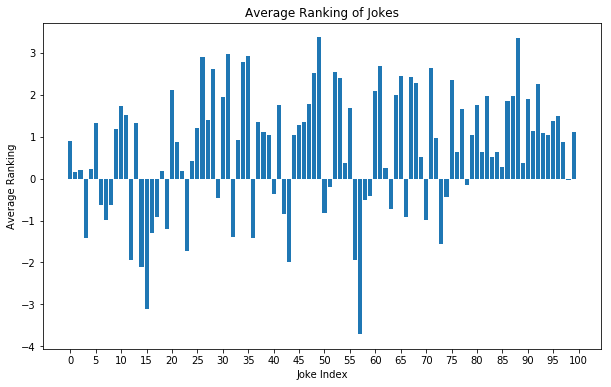

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Let's create a plot for the average rating of each joke
ax.bar(x=np.arange(0, 100), height=joke_avgs)
ax.set_title("Average Ranking of Jokes")
ax.set_xlabel("Joke Index")
ax.set_ylabel("Average Ranking")
ax.set_xticks(np.arange(0, 105, 5));

Text(0,0.5,'Frequency')

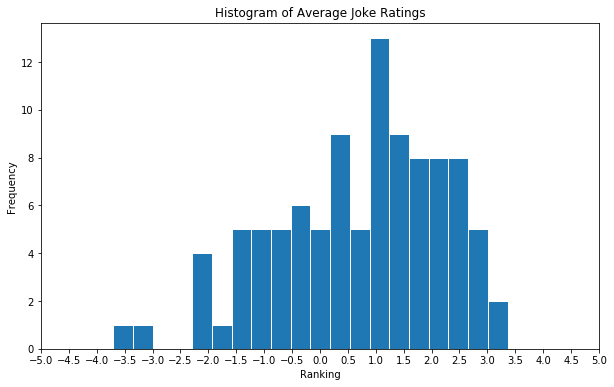

In [7]:
# And let's make a histogram of the amount each ranking
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(joke_avgs, bins=20, edgecolor="white")
ax.set_xticks(np.arange(-5, 5.5, 0.5))
ax.set_title("Histogram of Average Joke Ratings")
ax.set_xlabel("Ranking")
ax.set_ylabel("Frequency")

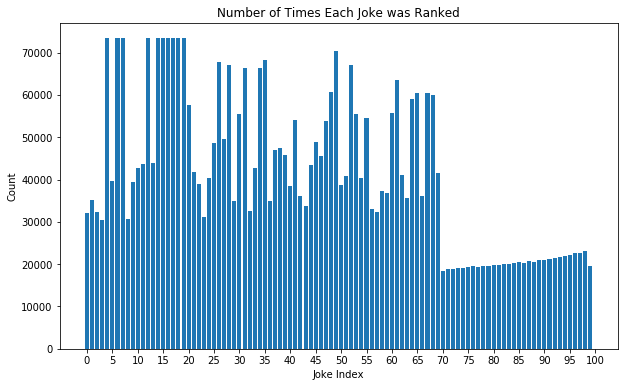

In [8]:
# And let's look at how many times each joke was rated
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

joke_counts = df.count()
ax.bar(x=range(0, 100), height=joke_counts)
ax.set_title("Number of Times Each Joke was Ranked")
ax.set_xlabel("Joke Index")
ax.set_ylabel("Count")
ax.set_xticks(np.arange(0, 105, 5));

We can see that jokes {5, 7, 8, 13, 15, 16, 17, 18, 19, 20} have been ranked the most, and can be considered dense. If we want to ask people for itinital joke rankings, it would be best to ask them those jokes. But the joke's distributions might be important as well. Let's look at jokes 5, 7, and 13 to get a few examples. 

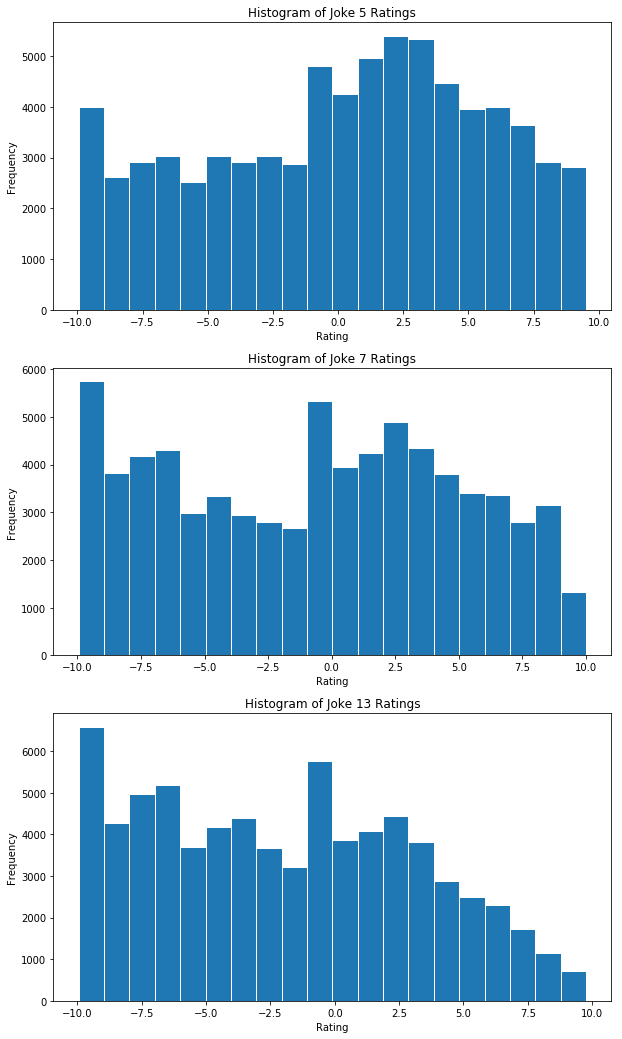

In [9]:
fig,ax = plt.subplots(3, 1, figsize=(10, 18))

joke5_ratings = df["joke5"].to_numpy()
joke5_ratings = joke5_ratings[~np.isnan(joke5_ratings)]

joke7_ratings = df["joke7"].to_numpy()
joke7_ratings = joke7_ratings[~np.isnan(joke7_ratings)]

joke13_ratings = df["joke13"].to_numpy()
joke13_ratings = joke13_ratings[~np.isnan(joke13_ratings)]

ax[0].hist(joke5_ratings, bins=20, edgecolor="white")
ax[0].set_title("Histogram of Joke 5 Ratings")
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Rating")

ax[1].hist(joke7_ratings, bins=20, edgecolor="white")
ax[1].set_title("Histogram of Joke 7 Ratings")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("Rating")

ax[2].hist(joke13_ratings, bins=20, edgecolor="white")
ax[2].set_title("Histogram of Joke 13 Ratings")
ax[2].set_ylabel("Frequency")
ax[2].set_xlabel("Rating");

Let's also make some plot for the user's themselves.  
* What was the distribution of user's average ratings?

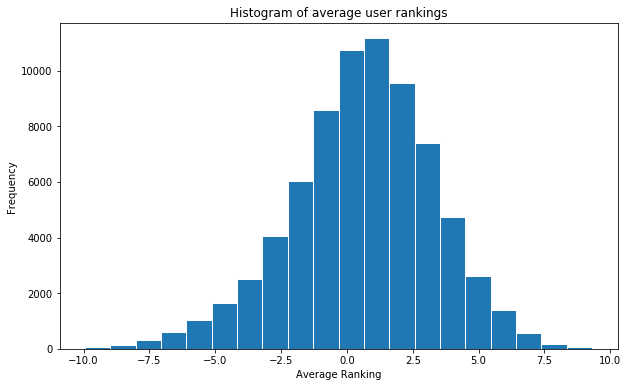

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(user_avgs[1:], bins=20, edgecolor="white")
ax.set_title("Histogram of average user rankings")
ax.set_xlabel("Average Ranking")
ax.set_ylabel("Frequency");

So we have the average rating, but we don't know if the data is independently sorted. As in, the data collectors could've sorted the data by some metric beforehand, which could effect our results, particularly if we choose a specific holdout set for evaluation.

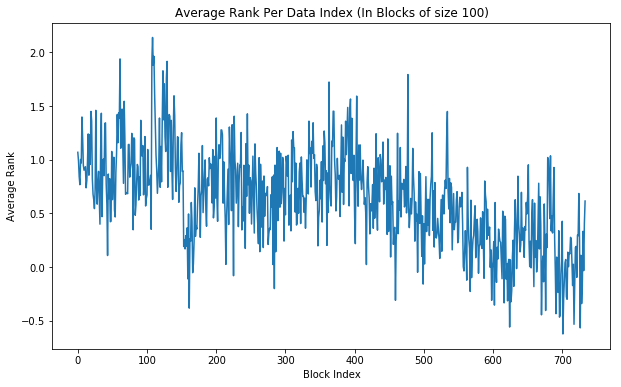

In [11]:
size_groups = 100
num_groups = int(df.shape[0] / size_groups)
avg_rating = np.zeros(num_groups)

for i in range(num_groups):
    group = df.iloc[i*size_groups: (i+1)*size_groups]
    avg_rating[i] = np.nanmean(group)
    
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(np.arange(num_groups), avg_rating)
ax.set_title("Average Rank Per Data Index (In Blocks of size {})".format(size_groups))
ax.set_xlabel("Block Index")
ax.set_ylabel("Average Rank");

So there is a trend in the data that the first few indexes have a generally higher ranking than the later indexes. This is important for telling us that, if we use a holdout set for evaluation, we should choose random indexes or else impart structured error into the results.

So we have a general idea of some trends of the data. It's worth noticing that our current data is only recommendations, which are useful for user-user and item-item recommendations, but not if we want to content-based recommendations. To get that, we're going to create a new content matrix and get some information from each joke:
* Subject of the joke (Political, Religious, "X, Y and Z walked into a bar", Profession based, etc) 
* TF-IDF of non-frequent terms (ie not including words like "the", "and", "she", "but", etc)

To get the first of the two, we could do some really complex natural language processing, but because there is only 100 jokes it will be considerably easier to just read all the jokes and do it by hand. To get the TF_IDF scores, we will need to code the algorithm. But first, time to read some bad jokes!

In [12]:
# Topic selection. Is hardcoded. Blech.
joke_content = np.zeros((df.shape[1], 15))  # 15 cols because that's how many "content" types of jokes I found.
# Column topics: 
# [Q/A format, medical, political, religious, race/nationality, career/profession, 
# sex/relationships, about gender, in a bar, current events, pun/play on words, 
# mothers/fathers, technology/science, animals, "screw in a lightbulb"]
joke_content[0] = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[1] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[2] = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[3] = [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[4] = [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[5] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[6] = [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
joke_content[7] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[8] = [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
joke_content[9] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[10] = [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[11] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[12] = [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[13] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
joke_content[14] = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[15] = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[16] = [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
joke_content[17] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
joke_content[18] = [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[19] = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
joke_content[20] = [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[21] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
joke_content[22] = [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[23] = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
joke_content[24] = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[25] = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
joke_content[26] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[27] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
joke_content[28] = [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
joke_content[29] = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[30] = [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[31] = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[32] = [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[33] = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[34] = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[35] = [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
joke_content[36] = [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
joke_content[37] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
joke_content[38] = [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[39] = [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
joke_content[40] = [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[41] = [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[42] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[43] = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
joke_content[44] = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
joke_content[45] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[46] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[47] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[48] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[49] = [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[50] = [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
# Now that I'm halfway done, I definately should've made this sparse
joke_content[51] = [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[52] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
joke_content[53] = [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[54] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
joke_content[55] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[56] = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[57] = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
joke_content[58] = [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[59] = [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[60] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[61] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[62] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[63] = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[64] = [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
joke_content[65] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[66] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[67] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[68] = [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[69] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[70] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
joke_content[71] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[72] = [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[73] = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
joke_content[74] = [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[75] = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[76] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[77] = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[78] = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[79] = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
joke_content[80] = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[81] = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
joke_content[82] = [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[83] = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[84] = [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
joke_content[85] = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
joke_content[86] = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[87] = [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[88] = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[89] = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]
joke_content[90] = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
joke_content[91] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[92] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
joke_content[93] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
joke_content[94] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[95] = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[96] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[97] = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
joke_content[98] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
joke_content[99] = [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]

Wow, some of those jokes are not good. But we push on for science! It would also be good to get some computational features of each joke. We can can calculate the TF-IDF scores for each word, for each joke. Because the other features are boolean values, and the TF_IDF scores will be floats, we probably won't be able to combine the two systems. But it could provide an interesting method of comparison, seeing which model built on which content system works better.

In [13]:
# Now we want to calculate the length of each joke.
filename = "JokeTexts.txt"
num_jokes = df.shape[1]
joke_lengths = np.zeros((num_jokes))
corpus = []  # Create a map for all unique words. This will map col_index to word

# Define a set of common words to not be included in the TF-IDF because don't influence joke content
common_words = ["the", "a", "be", "to", "of", "an", "in", "with", "at", "and", "have", "that", "i", "for", "or", \
                "his", "her", "had"]

# Need to find the corpus. Will then use this to define a matrix for each word and each document.
# Load in the file of all joke texts
with open(filename) as f:
    lines = f.read().split("\n")
    for joke_index, joke in enumerate(lines):
        joke = re.sub(r'[^\w\s]', '', joke)  # Remove all punctuation
        joke = joke.lower()  # Make all letters lowercase
        joke_words = joke.split()
        joke_lengths[joke_index] = len(joke_words)  # Store the length of each joke as a feature
        
        # Count the number of times each word occurs in full corpus.
        for word in joke_words:
            if word not in common_words and word not in corpus:
                # Add word to the corpus. This way we have map of word_index/col_index -> word
                corpus.append(word)

In [14]:
# TF-IDF computation
word_in_doc = np.ndarray((num_jokes, len(corpus)))  # Create a matrix for each word in the corpus and each document.
tfidf = np.ndarray((num_jokes, len(corpus)))

# Need to find how many documents each word is in.
with open(filename) as f:
    jokes = f.read().split("\n")
    # for each joke, normalize by removing capitalization and puctuation
    for joke_index, joke in enumerate(jokes):
        joke = re.sub(r'[^\w\s]', '', joke)  # Remove all punctuation
        joke = joke.lower()  # Make all letters lowercase
        joke_words = joke.split()
        for word in joke_words:
            if word in corpus:
                # Find the joke_index location
                word_index = corpus.index(word)
                word_in_doc[joke_index, word_index] += 1
    
# Calculate Term-Frequency. Number of times word appears in doc / total number of words in doc.
TF = (word_in_doc.T / joke_lengths).T

# Calculate the Inverse Doc Frequency. log(num_of_docs / num_of_docs_with_word)
# Get the number of times each word appears in all documents
num_docs_with_word = np.sum(word_in_doc > 0, axis=0)
IDF = np.log(num_jokes / num_docs_with_word)

# Calculate TF_IDF from the product of the two values.
TF_IDF = TF * IDF

In [15]:
# Now let's find the n most "important" words for each joke, just to check that it's working
n = 8
for row in TF_IDF[:3]:
    best_score_idxs = np.argsort(row)[-n:]
    for idx in best_score_idxs:
        print(corpus[idx])
    print()

man
god
alzheimers
disease
visits
thank
doctor
cancer

awful
move
pedophile
ten
excellent
him
she
told

front
willie
200
concert
teeth
row
nelson
4



Even from those select words, we can tell some of the jokes are bad. But if we look at the actual jokes, those are the "important" words, so we can assume the algorithm is working. We have our two content-based systems. Later on, we will test each one seperately as well as a joint matrix, and compare results.

In [16]:
# Define a matrix with both the human_selected categories and the TF_IDF scores
joint_joke_content = np.concatenate((joke_content, TF_IDF), axis=1)

# Collaborative Filtering System

In this section, we will try to calculate a system that will do peer-to-peer recommendations. We will use the Centered Cosine Similarity between user vectors to find the $m$ most similar users to user k, then use them to find the top $m$ jokes that user k hasn't ranked yet.

Let's start by creating a function to calculate the $m$ most similar other users, given a user vector, which can be from the dataframe or new entirely. Then we can use those $m$ users to predict rankings for our new user, and find the $n$ most likely high ranking jokes.

In [17]:
def centered_cosine_sim(new_user, dataframe):
    '''
    Calculates the centered cosine similarities between a vector of length n and a matrix of size m*n.
    
    new_user: Numpy Array of joke recommendations of length 100.
    dataframe: A pandas DataFrame of stored user recommendation data. Has 100 columns.
    
    return: Numpy Array of the centered cosine similarity between new_user and every row in dataframe
    '''
    
#     # Center all rows of the dataframe
#     center_df = dataframe.sub(np.nanmean(dataframe, axis=1), axis=0)
#     # Center the new_user vector
#     center_user = new_user - np.nanmean(new_user)

    ###################################### Test Code
    center_df = dataframe
    center_user = new_user
    ###################################### WHY IS THIS GIVING ME BETTER RESULTS THAT THE CENTERING ONE!!!!
    
    # Calculate the dot product of each row and the new_user
    numerator = np.nansum(center_df * center_user, axis=1)
    
    # Calculate the norm of the user and each row of the dataframe
    norm_user = np.sqrt(np.nansum(np.power(center_user, 2)))
    norm_df = np.sqrt(np.nansum(np.power(center_df, 2), axis=1))
    
    # Calculate the similarity scores for each row
    sim = numerator / (norm_user * norm_df)
    # Replace any nans with 0 (occur if dividing by zero, happens when all values of vector were the same)
    sim = np.nan_to_num(sim)
    
    return sim


def get_most_similar(sim_scores, m):
    '''
    Returns the indexes of the top m values from an input array. These correspond to the m most similar users 
    to some new user. The m is specified in this function.
    
    sim_scores: Numpy Array of similarity scores (floats).
    m: int, the number of most similar users to use for getting most recommended jokes.
    
    return: 
        Numpy Array of similarity scores corresponding to the m most similar users.
        NumPy Array of indexes corresponding to the location of the m most similar users.
    '''
    most_similar_scores = np.sort(sim_scores)[-m:]  # Gets the m most similar users
    most_similar_idxs = np.argsort(sim_scores)[-m:]  # Gets the indexes of the m most similar users
    # Note that if the "new_user" is a row from the original dataframe, then one of the returned 
    # indexes will be of the same row.
    
    return most_similar_scores, most_similar_idxs


def get_recommended_jokes(df_similar, top_sim_scores, n=5):
    '''
    Calculates the top ranked jokes from the preferences of the most similar users.
    n is specified in this function.
    
    df_similar: Pandas DataFrame of size m*101, where is m is number of most similar users to new_user
    top_sim_scores: Numpy Array of length m for the similarity scores between new_user and each similar user.
    n: Int, the number of top recommended jokes to return
    
    return: 
        :pred_top_jokes: Numpy Array of joke indexes corresponding to the highest predicted ranking jokes.
    '''    
    # Then calculate the score for each joke based on the each user's score and similarity score.
    predicted_ranks = np.nansum(df_similar.T * top_sim_scores, axis=1) / np.sum(top_sim_scores)
    
    # Get the n top predicted ranking jokes
    pred_top_jokes = np.argsort(predicted_ranks)[-n:]
    
    return pred_top_jokes, predicted_ranks


def collaborative_recommendation(new_user, rank_matrix, m=20, n=5):
    '''
    Wrapper function to find the top jokes for a new user, based on a collaborative filtering approach.
    
    :new_user: Pandas Series. Length 100, where each element is the user's ranking (or np.nan) for that joke.
    :rank_matrix: Pandas DataFrame. Contains ranks of all users. num_users rows by 100 columns.
    :m: Int. The number of "most similar" people to use to compute the top jokes.
    :n: Int. The number of top jokes returned.
    
    :return:
        :top_jokes: Numpy Array of joke indicies corresponding to the top n jokes.
        :predicted_ranks: Numpy Array of length 100, containing the predicted scores for each joke.
    '''
    # Calculate the similarity scores of each user to the new_user
    sim_scores = centered_cosine_sim(new_user, rank_matrix)
    
    # Get the scores and indexes of the m most similar users to the new_user
    most_sim_scores, most_sim_idxs = get_most_similar(sim_scores, m)
    
    # Create a new dataframe, only of the similar users to the new_user
    df_sim = rank_matrix.iloc[most_sim_idxs].copy()
    
    # Get the most highly ranked jokes for the new_user
    top_jokes, predicted_ranks = get_recommended_jokes(df_sim, most_sim_scores, n)
    
    return top_jokes, predicted_ranks

In [18]:
new_user = df.iloc[0]
jokes, ranks = collaborative_recommendation(new_user, df, 20, 5)
print("The predicted top ranking jokes for this user are: \n{}".format(jokes+1))
print("The jokes actual rankings are:\n{}".format(df.iloc[0, jokes]))

The predicted top ranking jokes for this user are: 
[27 54 35 65 29]
The jokes actual rankings are:
joke27    7.82
joke54    8.30
joke35    5.05
joke65    2.82
joke29    9.13
Name: 0, dtype: float64


So it outputs things we want it to output. But before we can jump into visualizing our model, we should tune our $m$ parameter to get the "optimal" number of similar users to get our "best" jokes from.

In [19]:
num_users = 10
np.random.seed(1234)
user_idxs = np.random.choice(df.shape[0], num_users)
# Create a holdout set. We remove part of the matrix (such as 50 rows and 50 cols) and see how similar our rankings are
# to the actual rankings
df_subsec = df.iloc[user_idxs, -50:].copy()
df_eval = df.copy()
df_eval.iloc[user_idxs, -50:] = np.nan

# Now let's test different numbers of similar users
m_values = np.arange(5, 205, 10)
RMSE_values = []
for m in m_values:
    # Get the rankings for the users of the holdout set.
    rankings = df_eval.iloc[user_idxs].apply(lambda user: collaborative_recommendation(user, df_eval, m, 5), axis=1)    
    
    # Results are in a weird format, so reformat and get the individual ranks of each joke for each user
    values = np.ndarray((rankings.size, 50))
    for idx, val in enumerate(rankings):
        values[idx] = val[1][-50:]

    # Calculate the difference between the actual values and the predicted values
    results = (df_subsec - values).to_numpy()
    results_plot = results[~np.isnan(results)]  # Remove the nan values
    
    # Calculate the RMSE as a way of determining how well our model performed. The lower the RMSE, the better.
    RMSE = np.sqrt(np.sum(np.power(results_plot, 2)) / len(results_plot))
    RMSE_values.append(RMSE)

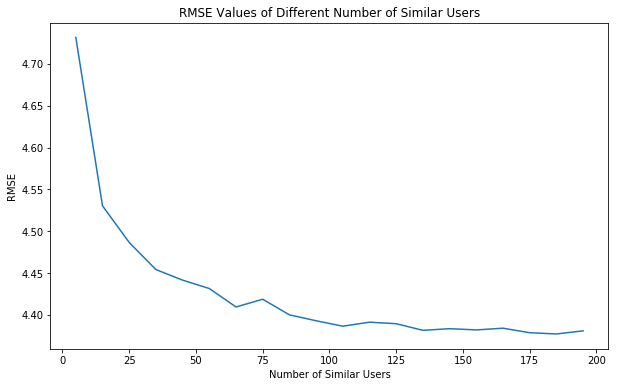

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(m_values, RMSE_values)
ax.set_title("RMSE Values of Different Number of Similar Users")
ax.set_xlabel("Number of Similar Users")
ax.set_ylabel("RMSE");

The RMSE plot levels out at about $m\approx100$, so we will use $100$ similar users in our future models. Now to visualize our system, we can use the same approach of having a holdout set and predicting the scores on the "missing" data. Then by determining how close the predictions were to the actual scores, we can get a good understanding of how well our model is performing.

In [21]:
# Create a copy of a subsection of the user matrix
num_users = 100
np.random.seed(1234)
user_idxs = np.random.choice(df.shape[0], num_users)  # Choose random indexes

df_subsec = df.iloc[user_idxs, -50:].copy()
df_eval = df.copy()
df_eval.iloc[user_idxs, -50:] = np.nan

collab_rankings = np.zeros((num_users, 50))
for iteration, user_idx in enumerate(user_idxs):
    new_user = df_eval.iloc[user_idx]
    _, pred_ranks = collaborative_recommendation(new_user, df_eval, 100, 5)
    collab_rankings[iteration] = pred_ranks[-50:]
    
# Calculate the difference between the predicted and actual rankings
collaborative_results = (df_subsec - collab_rankings).to_numpy()
# To plot a histogram, need to get rid of all the nans
collaborative_results_plot = collaborative_results[~np.isnan(collaborative_results)]

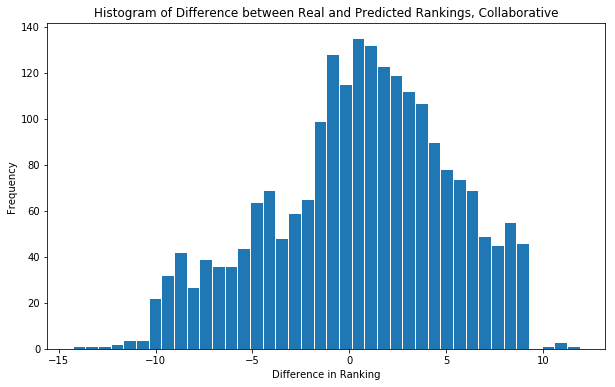

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(collaborative_results_plot, bins=40, edgecolor="white")
ax.set_title("Histogram of Difference between Real and Predicted Rankings, Collaborative")
ax.set_xlabel("Difference in Ranking")
ax.set_ylabel("Frequency");

It might also be useful to see the total sum of differences of each user. This way we could see the variance between user's predicted and actual scores, and see if there are some high-variance users.

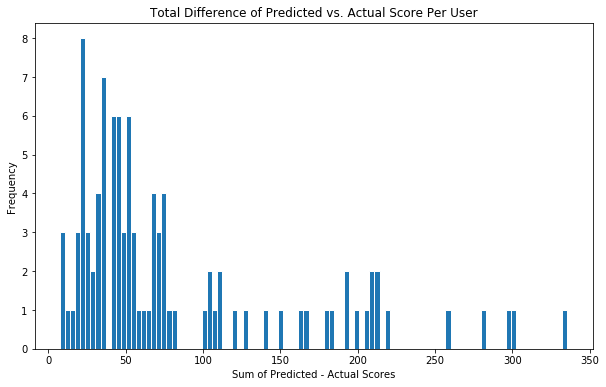

In [23]:
user_results = np.nansum(np.abs(collaborative_results), axis=1)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(user_results, bins=100, edgecolor="white")
ax.set_title("Total Difference of Predicted vs. Actual Score Per User")
ax.set_xlabel("Sum of Predicted - Actual Scores")
ax.set_ylabel("Frequency");

In [50]:
RMSE_collab = np.sqrt(np.sum(np.power(collaborative_results_plot, 2)))

print("Collaborative System RMSE score: {}".format(np.round(RMSE_collab, 4)))

Collaborative System RMSE score: 219.7339


From these two graphs, we can see quite a bit about our model. It looks like most of the differences are small, which is good, but there are some long tails on both sides, meaning some predictions are very wrong. The data is also mostly centered at zero, with a bias of about 1 to 2, making the average predictions some amount off. From the second plot, we can see that most users have low overall sum differences, as in on average each rating is about $0.6$ off from the actual value. However there are some outlier in the calculations, who have about $3.5$ difference between each predicted and actual value. From these results we can infer that the model is performing well for the "average" user, but doesn't predict to the "unique" users very well.

# Content Based System

We have the item-profiles from above, when I went through all the jokes and determined what categories they fall within. With this, we can make user-profiles, based on their ranks for the different joke categories.

In [24]:
def content_based_recommendation(new_user, joke_content, n=5):
    '''
    Make recommendations using content-based methods.
    
    new_user: Pandas Series or Numpy Array of a user's 100 recommendations. Can have nan values.
    joke_content: Numpy NDArray of categorical content of each joke.
    n: Integer for the number of jokes returned by the function
    
    :return:
        top_jokes: The n top-ranked jokes from the algorithm. Note the results are indexes of jokes from 
                   the joke_content matrix, which is zero indexed (joke1 is at index 0).
        
    '''
    # Normalize each row of item profile by dividing by the sqrt(num_of_features) for each joke.
#     normalized_content = joke_content / np.sqrt(np.sum(joke_content, axis=1)[:, np.newaxis])
    
    ########################## Test Code
    normalized_content = joke_content
    ##########################

    # Normalize each user by subtracing the mean score for all their rankings
    normalized_user = new_user - np.nanmean(new_user)

    # Construct the user profile by taking the average of the user_matrix. Has the user's score for each feature.
    # The user matrix is formed by multiplying element-wise the ith row of the content matrix with the ith element of the user
    user_matrix = normalized_content * normalized_user[:, np.newaxis]
    user_profile = np.nanmean(user_matrix, axis=0)

    # Now find the jokes that most correspond with the user's profile
    norm_content = np.sqrt(np.nansum(np.power(normalized_content, 2), axis=1))
    norm_user = np.sqrt(np.nansum(np.power(user_profile, 2)))
    dot_product = np.nansum(normalized_content * user_profile.T, axis=1)
    
    pred_enjoyment = dot_product / (norm_content * norm_user)
    top_jokes = np.argsort(pred_enjoyment)[-n:]
    
    return top_jokes, pred_enjoyment


In [25]:
# Now we can test it using the hard-coded categories
test_user = df.iloc[0]
content_results_1, _ = content_based_recommendation(test_user, joke_content, 5)

print("Using the hardcoded categories.")
print("The top jokes were {}.\nThe user rated these jokes as:\n{}".format(content_results_1, df.iloc[0, content_results_1+1]))

Using the hardcoded categories.
The top jokes were [49 45 11  1 71].
The user rated these jokes as:
joke51   -8.69
joke47    3.79
joke13   -7.18
joke3    -9.66
joke73     NaN
Name: 0, dtype: float64


In [26]:
# Let's try it again but with the TF_IDF data
content_results_2, _ = content_based_recommendation(test_user, TF_IDF, 5)
print("Using the TF_IDF data.")
print("The top jokes were {}.\nThe user rated these jokes as:\n{}".format(content_results_2, df.iloc[0, content_results_2]))

Using the TF_IDF data.
The top jokes were [13 26  7  1 33].
The user rated these jokes as:
joke14    8.45
joke27    7.82
joke8     4.17
joke2     8.79
joke34    7.82
Name: 0, dtype: float64


In [27]:
# And if we use the joint categorical and TF_IDF data
content_results_3, _ = content_based_recommendation(test_user, joint_joke_content, 5)
print("Using the joint categorical and TF_IDF data.")
print("The top jokes were {}.\nThe user rated these jokes as:\n{}".format(content_results_3, df.iloc[0, content_results_3]))

Using the joint categorical and TF_IDF data.
The top jokes were [11 45 49 53  1].
The user rated these jokes as:
joke12   -6.75
joke46   -6.26
joke50    4.13
joke54    8.30
joke2     8.79
Name: 0, dtype: float64


Because the content-based system doesn't predict rankings, but rather probabilities that the user will like the joke, we can't directly compare the results to the user's scores. What we can do is test whether the system is correctly guessing whether the user will rank a joke positively or negatively. I.e. if the system and user predict in the same direction, that they will or will not like a joke.

In [28]:
def evaluate_content_system(num_users, rank_matrix, content_matrix, n=5):
    '''
    Function to evaluate different content-based systems. Returns a percentage for each user for the amount of correctly
    predicted signs of ranks (i.e. if both the predicted or actual were both positive or negative).
    
    :num_users: Integer for the number of users to test from the system
    :df: Pandas Dataframe of user rankings
    :cotent_matrix: Numppy NdArray of content ranking. Either the categorical matrix, TF_IDF, or the joint of the two.
    :n: Integer. The number of top jokes returned.
    
    :return: Numpy Array of length num_users. Each entry is the proportion of correctly classified  signs of jokes to total
             actual jokes evaluated.
    '''
    # Create a copy of a subsection of the user matrix
    np.random.seed(1234)
    user_idxs = np.random.choice(rank_matrix.shape[0], num_users)
    df_eval = rank_matrix.iloc[user_idxs].copy()

    # Calculate probablities that each user will like each joke
    eval_rankings = df_eval.apply(lambda row: content_based_recommendation(row, content_matrix, n), axis=1)

    # Predictions get returned in a jumbled form, so need to reformat to be useful.
    pred_jokes = np.ndarray((num_users, n))
    pred_values = np.ndarray((num_users, 100))
    for idx, val in enumerate(eval_rankings):
        pred_jokes[idx] = val[0]
        pred_values[idx] = val[1]

    # Determine correct and incorrect predictions based on if the both signs agree
    do_rankings_agree = np.sign(pred_values) * np.sign(df_eval.to_numpy())
    correct_rankings = np.nansum(do_rankings_agree == 1, axis=1)
    incorrect_rankings = np.nansum(do_rankings_agree == -1, axis=1)

    # Calculate the ratio of correctly predicted to total predicted
    percent_correct_per_user = correct_rankings / (correct_rankings + incorrect_rankings)
    percent_correct_plot = percent_correct_per_user[~np.isnan(percent_correct_per_user)]  # Remove nans so can plot results
    
    return percent_correct_plot, pred_jokes

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sign


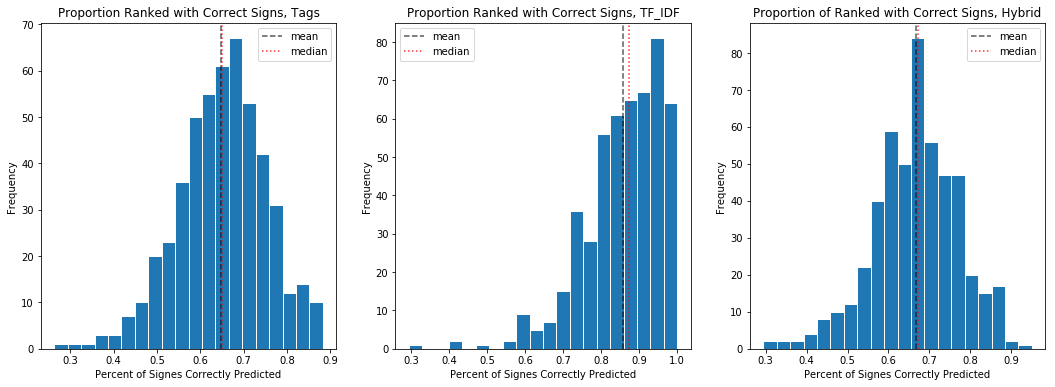

In [42]:
num_users = 500
results_categorical, jokes_categorical = evaluate_content_system(num_users, df, joke_content, 10)
results_tfidf, jokes_tfidf = evaluate_content_system(num_users, df, TF_IDF, 10)
results_joint, jokes_joint = evaluate_content_system(num_users, df, joint_joke_content, 10)


fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].hist(results_categorical, bins=20, edgecolor="white")
ax[0].axvline(np.mean(results_categorical), color="k", linestyle="dashed", alpha=0.65, label="mean")
ax[0].axvline(np.median(results_categorical), color="r", linestyle="dotted", alpha=0.8, label="median")
ax[0].set_xlabel("Percent of Signes Correctly Predicted")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Proportion Ranked with Correct Signs, Tags")
ax[0].legend();

ax[1].hist(results_tfidf, bins=20, edgecolor="white")
ax[1].axvline(np.mean(results_tfidf), color="k", linestyle="dashed", alpha=0.65, label="mean")
ax[1].axvline(np.median(results_tfidf), color="r", linestyle="dotted", alpha=0.8, label="median")
ax[1].set_xlabel("Percent of Signes Correctly Predicted")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Proportion Ranked with Correct Signs, TF_IDF")
ax[1].legend();

ax[2].hist(results_joint, bins=20, edgecolor="white")
ax[2].axvline(np.mean(results_joint), color="k", linestyle="dashed", alpha=0.65, label="mean")
ax[2].axvline(np.median(results_joint), color="r", linestyle="dotted", alpha=0.8, label="median")
ax[2].set_xlabel("Percent of Signes Correctly Predicted")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Proportion of Ranked with Correct Signs, Hybrid")
ax[2].legend();

It looks like the TF_IDF system does the best at predicting the signs of the resulting jokes, with an average of about 0.85, and the other two performed similarly, with an average of 0.65. This is helpful for showing that our models are predicting correctly better than a random guess, so something is going right. We do need to keep in mind that we are not measuring how much a person likes or dislikes a joke, just whether it has a positive or negative rating. 

Another evalulation measure that we can do is to see how many of the top $n$ predicted jokes are in the actual top $n$ jokes for each user.

In [32]:
def evaluate_content_top_jokes(system_best_jokes, rank_matrix):
    '''
    
    '''
    num_users = system_best_jokes.shape[0]
    num_best_jokes = system_best_jokes.shape[1]
    
    np.random.seed(1234)
    user_idxs = np.random.choice(rank_matrix.shape[0], num_users)
    df_eval = rank_matrix.iloc[user_idxs].copy()
    df_eval = df_eval.to_numpy()
    
    # Find the highest ranked jokes by the user
    user_best_jokes = np.argsort(-df_eval)[:, :num_best_jokes]
    
    # Determine if the top jokes of the system are the top jokes of the user
    isin = np.zeros((num_users, num_best_jokes))
    for ii in range(num_users):
        isin[ii] = np.isin(system_best_jokes[ii], user_best_jokes[ii])
    
    # Calculate the proportion of jokes that were in both system and user top jokes
    isin_prop = np.sum(isin, axis=1) / num_best_jokes
    
    return isin_prop

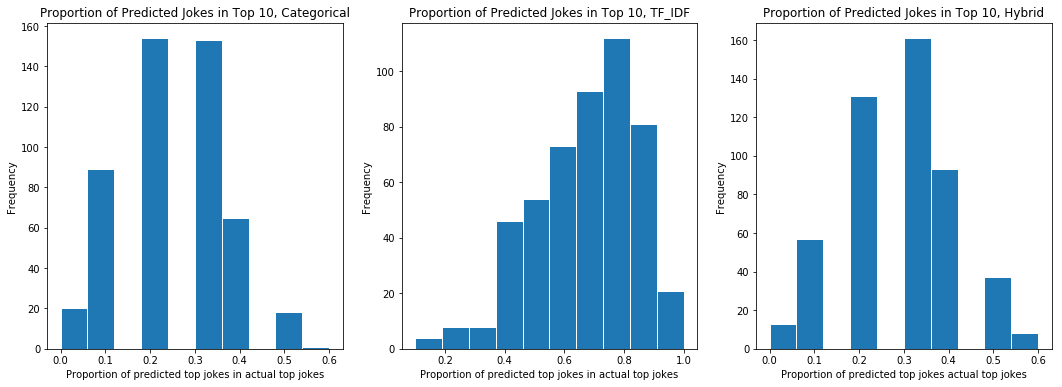

In [44]:
categorical_prop_correct = evaluate_content_top_jokes(jokes_categorical, df)
tfidf_prop_correct = evaluate_content_top_jokes(jokes_tfidf, df)
joint_prop_correct = evaluate_content_top_jokes(jokes_joint, df)

num_jokes = jokes_categorical.shape[1]

# fig, ax = plt.subplots(3, 1, figsize=(10, 18))
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].hist(categorical_prop_correct, bins=10, edgecolor="white")
ax[0].set_title("Proportion of Predicted Jokes in Top {}, Categorical".format(num_jokes))
ax[0].set_xlabel("Proportion of predicted top jokes in actual top jokes")
ax[0].set_ylabel("Frequency")

ax[1].hist(tfidf_prop_correct, bins=10, edgecolor="white")
ax[1].set_title("Proportion of Predicted Jokes in Top {}, TF_IDF".format(num_jokes))
ax[1].set_xlabel("Proportion of predicted top jokes in actual top jokes")
ax[1].set_ylabel("Frequency")

ax[2].hist(joint_prop_correct, bins=10, edgecolor="white")
ax[2].set_title("Proportion of Predicted Jokes in Top {}, Hybrid".format(num_jokes))
ax[2].set_xlabel("Proportion of predicted top jokes actual top jokes")
ax[2].set_ylabel("Frequency");

These plots show us a similar result. The system trained on the TF_IDF data performed the best, while the other two performed worse but similarly. Using these two conclusions, we can make the judgement that a best system would use the TF_IDF data an not the other two.

So we've decided to use the TF_IDF system. Let's do a holdout set evaluation with this system to see how well it performs. Although, we should note that the predictions are (mostly) between [-1, 1], so we can multiply the results by 10 to (mostly) get a result that mimics the actual scale of the rankings.

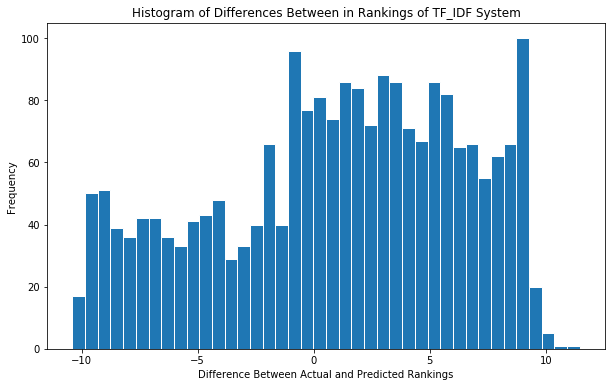

In [47]:
# How many users to compare
num_users_evaluated = 100
np.random.seed(1234)
user_idxs = np.random.choice(df.shape[0], num_users_evaluated)
# Define a holdout set using the 50 of the jokes
df_eval = df.copy()
df_subsec = df.iloc[user_idxs, -50:].copy()
df_eval.iloc[user_idxs, -50:] = np.nan

# Calculate the predicted scores for each joke of each user in the holdout set
eval_preds = np.zeros((num_users_evaluated, 50))
for ii, user_idx in enumerate(user_idxs):
    new_user = df_eval.iloc[user_idx]
    # Calculate the scores using the TF_IDF system, because has been the best performing so far
    _, content_preds = content_based_recommendation(new_user, TF_IDF, 5)
    # Multiply the results by 10 to align the probability predictions with the actual ranking scale
    eval_preds[ii] = content_preds[-50:] * 10
    
eval_diff = np.array(df_subsec - eval_preds)
eval_diff_plot = eval_diff[~np.isnan(eval_diff)]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(eval_diff_plot, bins=40, edgecolor="white")
ax.set_title("Histogram of Differences Between in Rankings of TF_IDF System")
ax.set_xlabel("Difference Between Actual and Predicted Rankings")
ax.set_ylabel("Frequency");

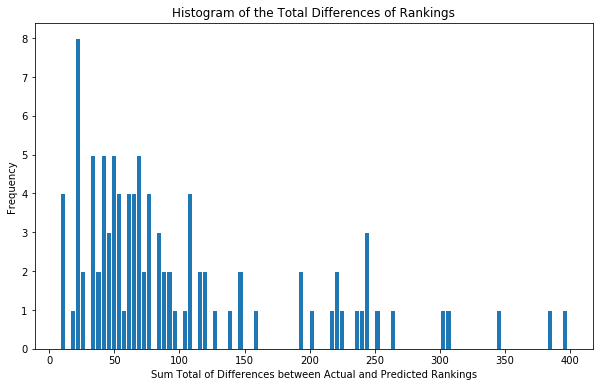

In [48]:
# Let's also find out the total deviation of each user.
eval_user_diff = np.nansum(np.abs(eval_diff), axis=1)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(eval_user_diff, bins=100, edgecolor="white")
ax.set_title("Histogram of the Total Differences of Rankings")
ax.set_xlabel("Sum Total of Differences between Actual and Predicted Rankings")
ax.set_ylabel("Frequency");

In [49]:
RMSE_content = np.sqrt(np.sum(np.power(eval_diff_plot, 2)))

print("TF_IDF RMSE: {}".format(RMSE_content))

TF_IDF RMSE: 254.45502673310702


Unlike the collaborative system, the content-based TF_IDF system does not provide a good basis for recommendation. We can see from the first plot that there is a consistant difference between the actual and predicted rankings. This could be explained from the content-based system not producing rankings for the jokes but probabilities that the user will like them, which we are scaling to fit the ranking scale. Either way, it would not provide a good system of recommendation on its own. This is supported by the second graph which shows that the average user has about a $0.7$ average difference between actual and predicted rankings, with outliers reaching up to a $4.0$ average difference in rankings.

So we have two different systems that attempt to solve the same problem. What kind of data scientists would we be if we didn't try to staple them together?

# Hybrid Systems

Now we have a collaborative and a content-based system. We could combine these systems for each ranking to try and get the best of both, and hopefully get more accurate results. Again, the content system doesn't provide "ranks," so we can multiply the predictions by 10 to get the content "ranks." Then by averaging the two scores, we should (hopefully) get a more accurate result. We will repeat the same two visualization plots as the first two systems so we can compare them.

In [36]:
num_users_evaluated = 100
np.random.seed(1234)
user_idxs = np.random.choice(df.shape[0], num_users_evaluated)
# Create a holdout set
df_eval = df.copy()
df_subsec = df.iloc[user_idxs, -50:].copy()
df_eval.iloc[user_idxs, -50:] = np.nan
# Calculate both the collaborative and content scores for each user in the holdout set, then get their average ranking
eval_preds = np.zeros((num_users_evaluated, 50))
for ii, user_idx in enumerate(user_idxs):
    new_user = df_eval.iloc[user_idx]
    _, collaborative_ranks = collaborative_recommendation(new_user, df_eval, 100, 5)
    _, content_preds = content_based_recommendation(new_user, TF_IDF, 5)
    # Take the average ranking of the collaborative and content results
    user_preds = (collaborative_ranks + (content_preds * 10)) / 2
    
    ####################################################################
    # Tried these aggregation methods but provided worse results
    # user_preds = (collaborative_ranks + (content_preds * 10/np.abs(np.max(content_preds)))) / 2  # scale content to [-10, 10]
    # user_preds = collaborative_ranks * np.abs(content_preds)  # Multiplicative
    # user_preds = np.abs(collaborative_ranks) * content_preds
    #####################################################################
    
    eval_preds[ii] = user_preds[-50:]

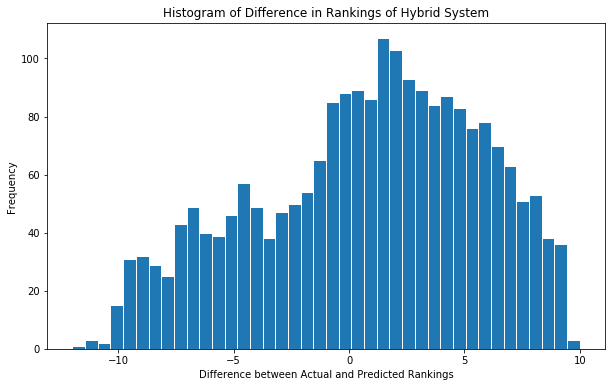

In [37]:
# Take the difference between the predicted and actual scores
hybrid_results = np.array(df_subsec - eval_preds)
hybrid_results_plot = hybrid_results[~np.isnan(hybrid_results)]

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(hybrid_results_plot, bins=40, edgecolor="white")
ax.set_title("Histogram of Difference in Rankings of Hybrid System")
ax.set_xlabel("Difference between Actual and Predicted Rankings")
ax.set_ylabel("Frequency");

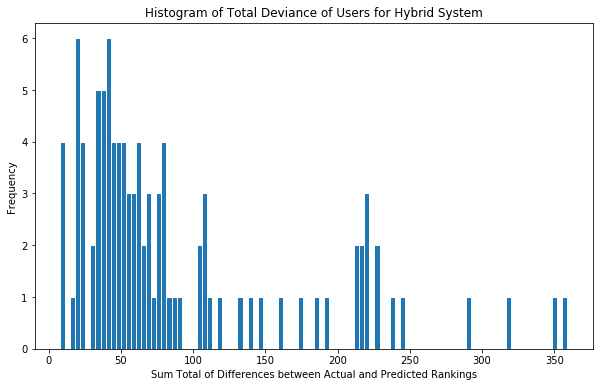

In [38]:
# Also plot the deviance of each user
hybrid_user_deviance = np.nansum(np.abs(hybrid_results), axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(hybrid_user_deviance, bins=100, edgecolor="white")
ax.set_title("Histogram of Total Deviance of Users for Hybrid System")
ax.set_xlabel("Sum Total of Differences between Actual and Predicted Rankings")
ax.set_ylabel("Frequency");

In [51]:
RMSE_hybrid = np.sqrt(np.sum(np.power(hybrid_results_plot, 2)))

print("RMSE for the hybrid system: {}".format(np.round(RMSE_hybrid, 4)))

RMSE for the hybrid system: 230.4386


Look at that! The hybrid system does pretty well. From the first plot, we see that there isn't a large bias of the rankings, as most are clustered around 0. From the second plot, we see that the average user has about a $0.3$ average difference between rankings and the most extreme outliers have about a $2.3$ average difference.

So what do we do now that we have a bunch of systems?

# Gimme Your Best Jokes

Now it's time for us to put in our joke rankings and find what our prefect jokes are. From the preliminary analysis, we saw that jokes {5, 7, 8, 13, 15, 16, 17, 18, 19, 20} are all dense, meaning will provide the most comparisons for the collaborative system, and would be the best to start with. So let's rank those jokes, put our rank vector in the systems, and see what jokes they split out for us!

In [39]:
my_vector = np.repeat(np.nan, 100)
# Recall that the jokes are 1 indexed and the array is 0 indexed
my_vector[4] = -3
my_vector[6] = -3
my_vector[7] = 4
my_vector[12] = -8
my_vector[14] = -2
my_vector[15] = -3
my_vector[16] = 3
my_vector[17] = 1
my_vector[18] = 4
my_vector[19] = 6

# Now we find the n most recommended jokes from each system
n = 5
# Collaborative System
_, collab_ranks = collaborative_recommendation(my_vector, df, 40, n)
# Content-Based System (TF_IDF)
_, content_preds = content_based_recommendation(my_vector, TF_IDF, n)
# Hybrid System
hybrid_ranks = (collab_ranks + (content_preds * 10)) / 2

# Only want to see jokes that haven't been ranked already
collab_ranks[~np.isnan(my_vector)] = np.nan
content_preds[~np.isnan(my_vector)] = np.nan
hybrid_ranks[~np.isnan(my_vector)] = np.nan

# Find the top n jokes from each system
collab_joke_idx = np.argsort(-collab_ranks)[:n]
content_joke_idx = np.argsort(-content_preds)[:n]
hybrid_joke_idx = np.argsort(-hybrid_ranks)[:n]

In [40]:
print("n = {}".format(n))
#  Plus 1 to each index because want the joke num, not index in matrix
print("The Collaborative System recommended jokes {}".format(collab_joke_idx + 1))
print("The Content-based System recommended jokes {}".format(content_joke_idx + 1))
print("The Hybrid System recommended jokes {}".format(hybrid_joke_idx + 1))

n = 5
The Collaborative System recommended jokes [32 50 36 35 27]
The Content-based System recommended jokes [ 51  78  64 100   4]
The Hybrid System recommended jokes [32 50 36 35 27]


In [58]:
my_vector = np.repeat(np.nan, 100)
# Recall that the jokes are 1 indexed and the array is 0 indexed
my_vector[6] = 10
my_vector[16] = 10
my_vector[84] = 10
my_vector[39] = 10
my_vector[89] = 10

# Now we find the n most recommended jokes from each system
n = 5
# Collaborative System
_, collab_ranks = collaborative_recommendation(my_vector, df, 40, n)
# Content-Based System (TF_IDF)
_, content_preds = content_based_recommendation(my_vector, TF_IDF, n)
# Hybrid System
hybrid_ranks = (collab_ranks + (content_preds * 10)) / 2

# Only want to see jokes that haven't been ranked already
collab_ranks[~np.isnan(my_vector)] = np.nan
content_preds[~np.isnan(my_vector)] = np.nan
hybrid_ranks[~np.isnan(my_vector)] = np.nan

# Find the top n jokes from each system
collab_joke_idx = np.argsort(-collab_ranks)[:n]
content_joke_idx = np.argsort(-content_preds)[:n]
hybrid_joke_idx = np.argsort(-hybrid_ranks)[:n]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


In [59]:
print("n = {}".format(n))
#  Plus 1 to each index because want the joke num, not index in matrix
print("The Collaborative System recommended jokes {}".format(collab_joke_idx + 1))
print("The Content-based System recommended jokes {}".format(content_joke_idx + 1))
print("The Hybrid System recommended jokes {}".format(hybrid_joke_idx + 1))

n = 5
The Collaborative System recommended jokes [ 5 19 50 29 18]
The Content-based System recommended jokes [ 1 73 72 71 70]
The Hybrid System recommended jokes [ 1 73 72 71 70]


Looking at the jokes that were recommended to me, the collaborative and hybrid systems did a way better job than the content-based system. Those jokes were pretty good. With that, I think we can conclude this notebook and say that the systems were successful. Yay, I can go to sleep now!

# Future Work

* Figure out why there is systematic error in all the systems.
* Improve the content-based system. It's probably what's pulling the hybrid system down.